<a href="https://colab.research.google.com/github/KomalMano/Story/blob/master/13_K_Means_Clustering_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
from google.colab import files
import numpy as np
import io
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [27]:
uploaded = files.upload()

Saving 13.K Means Clustering Algorithm.csv to 13.K Means Clustering Algorithm (1).csv


In [28]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "13.K Means Clustering Algorithm.csv" with length 384 bytes


In [29]:
uploaded

{'13.K Means Clustering Algorithm.csv': b'Name,Age,Income($)\r\nRob,27,70000\r\nMichael,29,90000\r\nMohan,29,61000\r\nIsmail,28,60000\r\nKory,42,150000\r\nGautam,39,155000\r\nDavid,41,160000\r\nAndrea,38,162000\r\nBrad,36,156000\r\nAngelina,35,130000\r\nDonald,37,137000\r\nTom,26,45000\r\nArnold,27,48000\r\nJared,28,51000\r\nStark,29,49500\r\nRanbir,32,53000\r\nDipika,40,65000\r\nPriyanka,41,63000\r\nNick,43,64000\r\nAlia,39,80000\r\nSid,41,82000\r\nAbdul,39,58000\r\n'}

In [30]:
df = pd.read_csv(io.StringIO(uploaded['13.K Means Clustering Algorithm.csv'].decode('utf-8')))
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


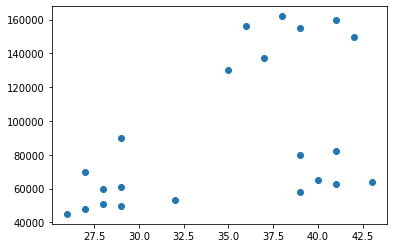

In [31]:
#Now i have ready my dataFrame for that . Since the data set is simple enough..
#I m 1st try to plot a scatter plot
plt.scatter(df['Age'],df['Income($)'])
#when u plot this on scatter chart . 
#u can kind of see 3 clusters . For this case choosing K is straight forward.

In [32]:
km = KMeans(n_clusters=3)
km 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
#the 2nd step is fit and predict
y_predicted = km.fit_predict(df[['Age','Income($)']]) # in prev supervised learning algo we use to do fit and calculate the calculate the score.
y_predicted
#I m just doing fit and predict
#So fit and predict what? I m going to fit and predict the data frame and excluding the name column .
#Bcz name column is string and it's not gone a be useful i nour numeric computation.
#So i want to ignore it.


#So what this satatement did?
#So it ran is K-algorithm on age and income which is this scatter plot and it computate the cluster as per our criteria .
#Where 2 algorithm to identify 3 clusters some how. it didi it . It just assign them different labels .
#So u can see 3 clusters 0,1,2. So visualzing these array it's not a very much fun. So what we want to do is? We want to plot it again on a scatter plot .
#So that we can see . What kind of clustering result did it produced. 

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [34]:
#So in my dataframe . I m going to append this particular column .
df['cluster'] = y_predicted
df.head()

#It is good to 2 guys belong to same and next 2 also same.
#But it is still not as good as scatter plot . So let's do this. 

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


No handles with labels found to put in legend.


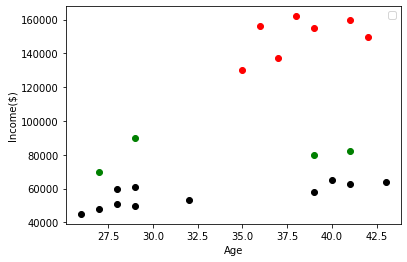

In [35]:
#what we need to do is? 
#We need separate these 3 clusters into 3 different data frame
#So what's this is doing? It's returning all the rows from the dataframe where cluster is zero. 
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
#So now we have 3 dataframes each belonging to 1 cluster.
plt.scatter(df1.Age,df1['Income($)'],color='green') # Now i want to plot these 3 dataframes on to 1 scatter plot
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

#I see scatter plot is here but there is little problem. 
#red cluster looks ok. But the other 2 is not. But these 2 r not grouped correctly.
#this problem is bcz of our scaling is not right.
#Our y scale is 40 to 160 and the x axis is pretty narrow. Sees like hardly 20.
#So if u dont scale ur features properly u might get in this problem that's why u need some preprocessing and use MinMax Sclaer to scale these 2 feature .
#And then only we can run our algorithm.


In [36]:
#So we r going to use MinMax Scaler 
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']]) # So my MinMaxScaler make to try the the scale zero to 1.
df['Income($)'] = scaler.transform(df[['Income($)']])  # now scaler will scale the income feature
df 
#So u can see that the income will be scale that

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [37]:
# now our income range is from zero to 1 not out of range. 
#Now we will also doing this with age also.
scalers = MinMaxScaler()
scalers.fit(df[['Age']])
df['Age'] = scalers.transform(df[['Age']])
df
#Now we have age and income features is scale now properly.

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [38]:
#If u plot these on scatter plot they will look like this sc=tructure like this.
#Now K-Means algorithms again to train our scale data set . What's scaling can give us.

#So again i started with 3 clusters . I m just fitting my scale data.
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted
#So it predicted some values which yet don't know how good they are .

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [39]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [52]:
# In theory section we have studied the centroid . If u look at K Means model. that has called clusters centers.
km.cluster_centers_ #and these centers are basically ur centroids .

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

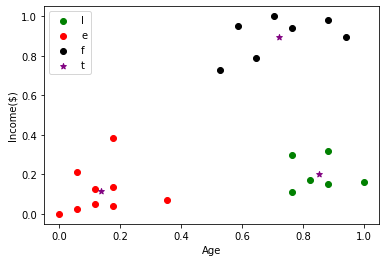

In [58]:
#just now plot on to on scatter plot
df5 = df[df.cluster==0]
df6 = df[df.cluster==1]
df7 = df[df.cluster==2]
plt.scatter(df5.Age,df5['Income($)'],color='green')
plt.scatter(df6.Age,df6['Income($)'],color='red')
plt.scatter(df7.Age,df7['Income($)'],color='black')
# it's a centroid star show like this. :, its mean all row and 0 means 1st column. and y is to 1st column.
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
#Now u can see that these are the centers which r my clusters . 

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend('left')
#Now u can see that very good clusters red , green , black

In [59]:
#now let see my elbow plot method . When u try to solve real life problem. U come across data set .
#which will like have 20 features . It will hard to plot the scatter plot and it will just get messy and u will like what u do know.
#Well u use ur elbow plot method . In elbow plot we saw in thory we go through number of K's. 
#So let's say go K=1 to 10 in our case . And we try to calculate SSE which is sum of square errors and then plot them and try to find them this elbow.

k_rng = range(1,10)
sse = [] # and then sum of square error is an array . So for k=1 u will find SSE k=2. u will find sse u will store all of that into this array and then use matplotlib to plot the result.

for k in k_rng:
  km = KMeans(n_clusters=k) # in each iteration i create a new model with clusters=k 
  km.fit(df[['Age','Income($)']]) # and then i call fit. and what i try to fit? I try to fit my data frame . I use this DF bcz I've use name column.
  sse.append(km.inertia_) # Now what is my SSE is now? and how do i get that?When u call km.fit after that ur K Means there is a parameter called inertia that will give u sum of square errors. And that error I want to just append to it to our array that we have .


In [60]:
#Let se SSE
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2621792762345213,
 0.22020960864009398,
 0.16858512236029757,
 0.14686902060545334,
 0.10907864282306066]

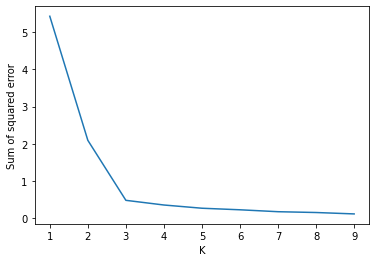

In [63]:
#Now let's plot this guy into chart
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
#When u do that u get elbow plot. where is my elbow? At 3 . I have 3 clusters .
